# Projeto de Classificação de Frutas

Este notebook é uma reescrita do notebook original, seguindo as instruções fornecidas. O objetivo é criar um modelo de aprendizado de máquina para classificar diferentes tipos de frutas.

As instruções gerais para este projeto são as seguintes:

- Utilizaremos a LetNet-5 como exemplo inicial, bem como o exemplo visto em sala de aula do dataset minst.
- Iniciaremos o trabalho com parte do dataset e iremos adicionar gradativamente mais tipos distintos de frutas.
- É permitido usar outras abordagens e arquiteturas.
- É permitido o uso de Autoencoders.
- É obrigatório o uso de CNN.
- É permitido o uso de técnicas de processamento de imagens.
- Não é permitido o uso de modelos pré-treinados.
- Faremos uma boa distribuição dos dados de teste, treinamento e validação.

Além disso, seguiremos as seguintes instruções adicionais:

- Separaremos bem as células.
- Criaremos uma etapa de EDA básica.
- Comentaremos o código devidamente e criaremos markdowns explicativos.
- Todas as predições não podem possuir lags de predição, poucos lags são permitidos.
- Escreveremos os comentários e markdowns em português.

## Importação das bibliotecas

Primeiro, vamos importar todas as bibliotecas necessárias para o projeto.

In [1]:
import os
import shutil
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D,AveragePooling2D
from tensorflow.keras.utils import img_to_array , load_img
from keras import preprocessing
from keras.callbacks import ModelCheckpoint



## Preparação dos dados

Agora, vamos preparar os dados para serem alimentados no modelo. Isso inclui a divisão dos dados em conjuntos de treinamento, validação e teste, bem como a normalização dos dados.

In [6]:
import contextlib
source_dir = 'fruits/fruits-360_dataset/fruits-360/Training'
dest_dir = 'fruits/fruits-360_dataset/fruits-360/Training_30_fruits'

# Cria o diretório de destino se ele não existir
with contextlib.suppress(Exception):
    if not os.path.exists(dest_dir):
        os.makedirs(dest_dir)

# Copia as pastas das 30 primeiras frutas para o diretório de destino
fruits = ['Apple Braeburn', 'Apple Golden 1', 'Apple Golden 2', 'Apple Golden 3', 'Apple Granny Smith', 'Apple Red 1', 'Apple Red 2', 'Apple Red 3', 'Apple Red Delicious', 'Apple Red Yellow 1', 'Apricot', 'Avocado', 'Avocado ripe', 'Banana', 'Banana Lady Finger', 'Banana Red', 'Cactus fruit', 'Cantaloupe 1', 'Cantaloupe 2', 'Carambula', 'Cherry 1', 'Cherry 2', 'Cherry Rainier', 'Cherry Wax Black', 'Cherry Wax Red', 'Cherry Wax Yellow', 'Chestnut', 'Clementine', 'Cocos', 'Dates']

with contextlib.suppress(Exception):
    for fruit in fruits:
        src_path = os.path.join(source_dir, fruit)
        dest_path = os.path.join(dest_dir, fruit)
        shutil.copytree(src_path, dest_path)

In [7]:
train_datagen = preprocessing.image.ImageDataGenerator(validation_split=0.20)
train_generator = train_datagen.flow_from_directory(
    'fruits/fruits-360_dataset/fruits-360/Training_30_fruits',
    batch_size=200,
    color_mode='rgb',
    subset='training',
    target_size=(30, 30)
    )


Found 12018 images belonging to 30 classes.


In [8]:
valid_generator = train_datagen.flow_from_directory(
    'fruits/fruits-360_dataset/fruits-360/Training_30_fruits',
    batch_size=200,
    color_mode = 'rgb',
    subset='validation',
    target_size=(30, 30)
    )

Found 2994 images belonging to 30 classes.


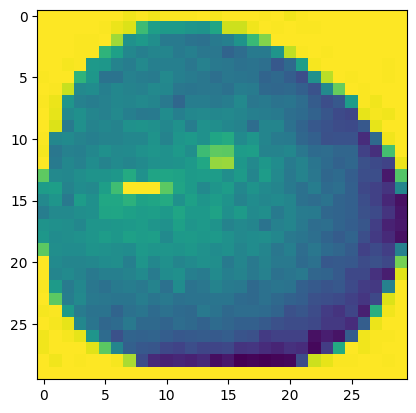

In [9]:
#Visualizando 
x,y = train_generator.next()
for i in range(1):
    image = x[i]   
    plt.imshow(image[:,:,0])
    plt.show()

## Construção do Modelo

Agora, vamos construir o modelo de rede neural convolucional (CNN). Estamos usando a arquitetura LeNet-5 como nosso ponto de partida.

In [13]:
num_classes = y[0].shape[0]

STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size


In [14]:
# Cria o modelo
model = Sequential()
#Convolução 2D com função de ativação Rectified Linear Units 32 kernels/Pesos (filtros) 
model.add(Conv2D(32, (7, 7), input_shape=(30,30,3), activation='relu')) #, data_format='channels_first'
print( model.output_shape)
#Camada de Pooling 	    
model.add(AveragePooling2D(pool_size=(2, 2)))
print( model.output_shape)
	
#Convolução 2D com função de ativação Rectified Linear Units 64 kernels/Pesos (filtros) 
model.add(Conv2D(64, (5, 5), activation='relu'))
print( model.output_shape)
#Camada de Pooling 	
model.add(AveragePooling2D(pool_size=(2, 2)))
print( model.output_shape)

#Convolução 2D com função de ativação Rectified Linear Units 128 kernels/Pesos (filtros) 
model.add(Conv2D(128, (3, 3), activation='relu'))
print( model.output_shape)
#Camada de Pooling 	
model.add(AveragePooling2D(pool_size=(2, 2)))
print( model.output_shape)

#Remove 30% dos dados de entrada aleatoriamente 
model.add(Dropout(0.3))
#Converte o conjunto de imagens e um vetor unidimensional para a entrada da rede neural totalmente conectada
model.add(Flatten())
print( model.output_shape)

model.add(Dense(512, activation='relu'))
print( model.output_shape)
model.add(Dense(128, activation='relu'))
print( model.output_shape)
model.add(Dense(64, activation='relu'))
print( model.output_shape)
model.add(Dense(num_classes, activation='softmax'))
print( model.output_shape)


(None, 24, 24, 32)
(None, 12, 12, 32)
(None, 8, 8, 64)
(None, 4, 4, 64)
(None, 2, 2, 128)
(None, 1, 1, 128)
(None, 128)
(None, 512)
(None, 128)
(None, 64)
(None, 30)


## Treinamento do Modelo

Agora que temos nosso modelo construído, vamos treiná-lo com nossos dados de treinamento.

In [15]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
mcp_save = ModelCheckpoint('model_best.h5', monitor='val_accuracy', mode= 'auto', save_weights_only=True, save_best_only=True, verbose =1)
#reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=7, verbose=1, epsilon=1e-4, mode='min')

model.summary()

model.fit_generator(train_generator, 
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=10, callbacks=[mcp_save])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        4736      
                                                                 
 average_pooling2d (AverageP  (None, 12, 12, 32)       0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 64)          51264     
                                                                 
 average_pooling2d_1 (Averag  (None, 4, 4, 64)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_2 (Conv2D)           (None, 2, 2, 128)         73856     
                                                                 
 average_pooling2d_2 (Averag  (None, 1, 1, 128)        0

C:\Users\KAIQUEHENRIQUEVALIM\AppData\Local\Temp\ipykernel_17368\2336998042.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_generator,


60/60 [==============================] - ETA: 0s - loss: 2.0782 - accuracy: 0.4281
Epoch 1: val_accuracy improved from -inf to 0.78714, saving model to model_best.h5
60/60 [==============================] - 13s 201ms/step - loss: 2.0782 - accuracy: 0.4281 - val_loss: 0.7123 - val_accuracy: 0.7871
Epoch 2/10
60/60 [==============================] - ETA: 0s - loss: 0.3953 - accuracy: 0.8589
Epoch 2: val_accuracy improved from 0.78714 to 0.87036, saving model to model_best.h5
60/60 [==============================] - 7s 113ms/step - loss: 0.3953 - accuracy: 0.8589 - val_loss: 0.6451 - val_accuracy: 0.8704
Epoch 3/10
60/60 [==============================] - ETA: 0s - loss: 0.1760 - accuracy: 0.9345
Epoch 3: val_accuracy improved from 0.87036 to 0.88750, saving model to model_best.h5
60/60 [==============================] - 7s 113ms/step - loss: 0.1760 - accuracy: 0.9345 - val_loss: 0.5648 - val_accuracy: 0.8875
Epoch 4/10
60/60 [==============================] - ETA: 0s - loss: 0.0928 - acc

## Avaliação do Modelo

Após o treinamento, vamos avaliar o desempenho do nosso modelo nos dados de teste.

In [18]:
import contextlib
source_dir = 'fruits/fruits-360_dataset/fruits-360/Test'
dest_dir = 'fruits/fruits-360_dataset/fruits-360/Test_30_fruits'

# Cria o diretório de destino se ele não existir
with contextlib.suppress(Exception):
    if not os.path.exists(dest_dir):
        os.makedirs(dest_dir)
        
# Copia as pastas das 30 primeiras frutas para o diretório de destino
fruits = ['Apple Braeburn', 'Apple Golden 1', 'Apple Golden 2', 'Apple Golden 3', 'Apple Granny Smith', 'Apple Red 1', 'Apple Red 2', 'Apple Red 3', 'Apple Red Delicious', 'Apple Red Yellow 1', 'Apricot', 'Avocado', 'Avocado ripe', 'Banana', 'Banana Lady Finger', 'Banana Red', 'Cactus fruit', 'Cantaloupe 1', 'Cantaloupe 2', 'Carambula', 'Cherry 1', 'Cherry 2', 'Cherry Rainier', 'Cherry Wax Black', 'Cherry Wax Red', 'Cherry Wax Yellow', 'Chestnut', 'Clementine', 'Cocos', 'Dates']

with contextlib.suppress(Exception):
    for fruit in fruits:
        src_path = os.path.join(source_dir, fruit)
        dest_path = os.path.join(dest_dir, fruit)
        shutil.copytree(src_path, dest_path)


In [19]:
test_datagen = preprocessing.image.ImageDataGenerator()
test_generator = test_datagen.flow_from_directory(
    'fruits/fruits-360_dataset/fruits-360/Test_30_fruits',
    batch_size=1,
    color_mode = 'rgb',    
    target_size=(30, 30))

Found 5035 images belonging to 30 classes.


In [20]:
scores = model.evaluate_generator(test_generator)   
print(scores)

C:\Users\KAIQUEHENRIQUEVALIM\AppData\Local\Temp\ipykernel_17368\1459900303.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  scores = model.evaluate_generator(test_generator)


[0.3353519141674042, 0.9090367555618286]


In [21]:
predictions = model.predict_generator(test_generator)
print(predictions)

C:\Users\KAIQUEHENRIQUEVALIM\AppData\Local\Temp\ipykernel_17368\3347971648.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_generator)


[[1.27578156e-12 1.62169984e-12 6.84564786e-15 ... 3.70669218e-10
  3.09139796e-06 1.69519765e-09]
 [4.11511320e-12 1.04965077e-08 5.64146473e-12 ... 1.84132077e-07
  1.47002172e-21 2.65527538e-27]
 [2.78189070e-18 3.23088041e-18 7.27268444e-18 ... 1.40989871e-14
  4.87419272e-10 7.85469606e-11]
 ...
 [1.37989028e-14 7.55115727e-15 1.09286474e-13 ... 9.22314114e-10
  2.83019716e-07 1.32409162e-11]
 [3.84649112e-28 1.80549876e-20 1.98553842e-30 ... 1.19151159e-18
  9.87842546e-20 1.00789101e-19]
 [1.35895971e-25 3.60231912e-23 2.59925623e-33 ... 7.39263090e-24
  1.38553298e-21 6.48309570e-22]]


In [22]:
res1 = np.argmax(predictions[0,:])
print(res1) 

26


Como Fazer a predição de uma imagem PNG?

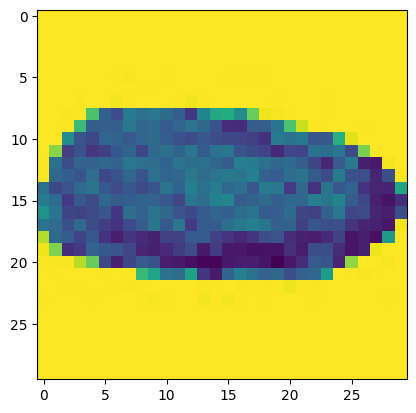

In [23]:
#fileimg = r'D:\digito_7_2SAN.png'
fileimg = r'fruits\fruits-360_dataset\fruits-360\Test_30_fruits\Dates\4_100.jpg'

img = load_img(fileimg , color_mode = "rgb", target_size=(30, 30))

#
x = img_to_array(img)

plt.imshow(x[:,:,0])
plt.show()

In [25]:
x = np.expand_dims(x, axis=0)
x.shape

(1, 30, 30, 3)

In [26]:
y_pred = model.predict(x)

res = np.argmax(y_pred)
print(res)

1/1 [==============================] - 0s 70ms/step
29


In [27]:
y_pred

array([[6.3672342e-13, 5.9631175e-11, 3.0548942e-12, 1.3533523e-10,
        5.3925669e-10, 5.2286564e-11, 2.4509371e-13, 2.3609847e-13,
        1.9754049e-07, 6.6006457e-11, 4.0576258e-13, 8.8131236e-10,
        2.4322679e-07, 1.3048501e-05, 4.8182420e-11, 4.3673504e-06,
        1.5089209e-07, 6.7022867e-08, 7.6155150e-12, 4.3581508e-08,
        5.1543680e-09, 6.7531909e-12, 1.0429684e-11, 4.1753569e-07,
        6.4631887e-09, 7.9099982e-14, 1.5672080e-07, 8.6491264e-10,
        2.6739666e-11, 9.9998128e-01]], dtype=float32)

In [28]:
train_generator.class_indices

{'Apple Braeburn': 0,
 'Apple Golden 1': 1,
 'Apple Golden 2': 2,
 'Apple Golden 3': 3,
 'Apple Granny Smith': 4,
 'Apple Red 1': 5,
 'Apple Red 2': 6,
 'Apple Red 3': 7,
 'Apple Red Delicious': 8,
 'Apple Red Yellow 1': 9,
 'Apricot': 10,
 'Avocado': 11,
 'Avocado ripe': 12,
 'Banana': 13,
 'Banana Lady Finger': 14,
 'Banana Red': 15,
 'Cactus fruit': 16,
 'Cantaloupe 1': 17,
 'Cantaloupe 2': 18,
 'Carambula': 19,
 'Cherry 1': 20,
 'Cherry 2': 21,
 'Cherry Rainier': 22,
 'Cherry Wax Black': 23,
 'Cherry Wax Red': 24,
 'Cherry Wax Yellow': 25,
 'Chestnut': 26,
 'Clementine': 27,
 'Cocos': 28,
 'Dates': 29}